In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
watch_prices = pd.read_csv("Smart watch prices.csv")
watch_prices.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [3]:
watch_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [4]:
watch_prices.isnull().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [5]:
watch_prices.dropna(inplace=True,axis=0)

In [6]:
watch_prices.isnull().sum()

Brand                        0
Model                        0
Operating System             0
Connectivity                 0
Display Type                 0
Display Size (inches)        0
Resolution                   0
Water Resistance (meters)    0
Battery Life (days)          0
Heart Rate Monitor           0
GPS                          0
NFC                          0
Price (USD)                  0
dtype: int64

In [7]:
watch_prices.drop(["Operating System","Display Type","Model","Brand"],axis=1,inplace=True)

In [8]:
watch_prices.head(2)

,Connectivity,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,"Bluetooth, Wi-Fi, Cellular",1.9,396 x 484,50,18,Yes,Yes,Yes,$399
1,"Bluetooth, Wi-Fi, Cellular",1.4,450 x 450,50,40,Yes,Yes,Yes,$249


In [9]:
watch_prices["Connectivity"].value_counts() #isprr kaam krna hoga

Bluetooth, Wi-Fi              292
Bluetooth, Wi-Fi, Cellular     64
Bluetooth, Wi-Fi, GPS          10
Bluetooth                       7
Bluetooth, Wi-Fi, NFC           1
Name: Connectivity, dtype: int64

In [10]:
watch_prices_1 = pd.get_dummies(watch_prices[watch_prices.columns[6:8]])
watch_prices_1.drop(["GPS_No","NFC_No"],axis=1,inplace=True) 
watch_prices_1.columns = ["GPS","NFC"]

In [11]:
watch_prices["GPS"] = watch_prices_1["GPS"]
watch_prices["NFC"] = watch_prices_1["NFC"]
watch_prices.head()

,Connectivity,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,"Bluetooth, Wi-Fi, Cellular",1.90,396 x 484,50,18,Yes,1,1,$399
1,"Bluetooth, Wi-Fi, Cellular",1.40,450 x 450,50,40,Yes,1,1,$249
2,"Bluetooth, Wi-Fi",1.30,416 x 416,50,11,Yes,1,0,$399
3,"Bluetooth, Wi-Fi",1.58,336 x 336,50,6,Yes,1,1,$229
4,"Bluetooth, Wi-Fi",1.28,416 x 416,30,24,Yes,1,1,$299


In [12]:
watch_prices["Heart Rate Monitor"] = pd.get_dummies(watch_prices["Heart Rate Monitor"])

In [13]:
watch_prices.head()

,Connectivity,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,"Bluetooth, Wi-Fi, Cellular",1.90,396 x 484,50,18,1,1,1,$399
1,"Bluetooth, Wi-Fi, Cellular",1.40,450 x 450,50,40,1,1,1,$249
2,"Bluetooth, Wi-Fi",1.30,416 x 416,50,11,1,1,0,$399
3,"Bluetooth, Wi-Fi",1.58,336 x 336,50,6,1,1,1,$229
4,"Bluetooth, Wi-Fi",1.28,416 x 416,30,24,1,1,1,$299


<Axes: >

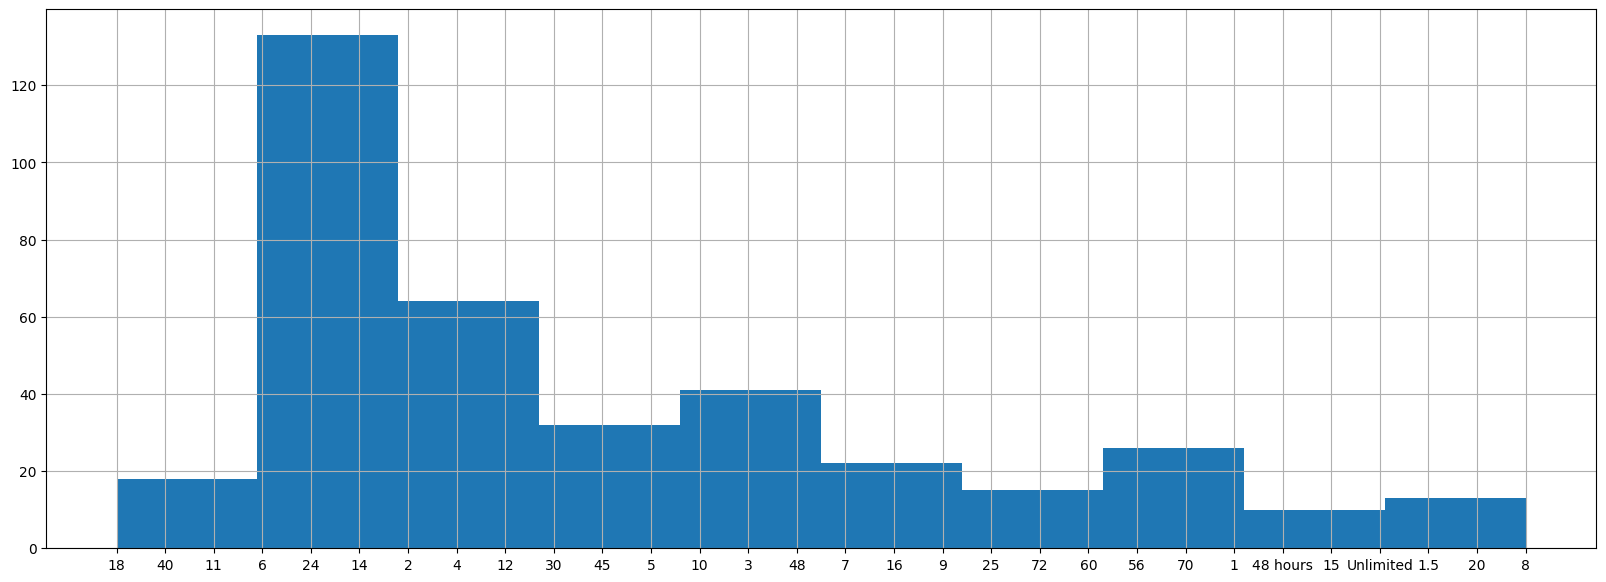

In [14]:
watch_prices["Battery Life (days)"].hist(figsize=(20,7))

<Axes: xlabel='GPS', ylabel='count'>

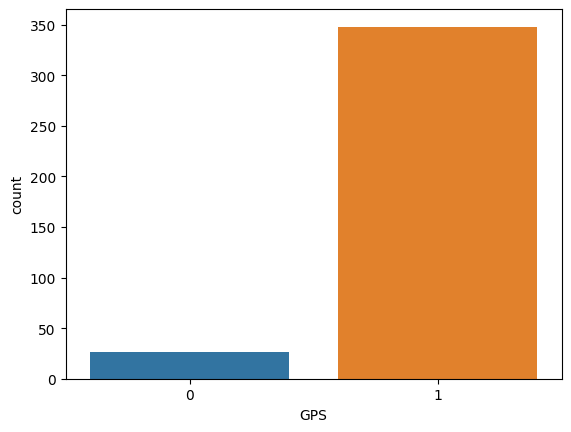

In [15]:
sns.countplot(x="GPS",data=watch_prices)

<Axes: xlabel='NFC', ylabel='count'>

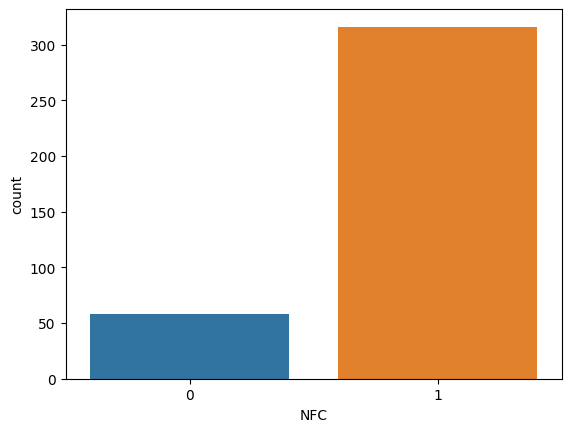

In [16]:
sns.countplot(x="NFC",data=watch_prices)

In [17]:
watch_prices.head(2)

,Connectivity,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,"Bluetooth, Wi-Fi, Cellular",1.9,396 x 484,50,18,1,1,1,$399
1,"Bluetooth, Wi-Fi, Cellular",1.4,450 x 450,50,40,1,1,1,$249


In [18]:
watch_prices["Price (USD)"].head(2)

0    $399 
1    $249 
Name: Price (USD), dtype: object

In [19]:
watch_prices["Price"] = watch_prices["Price (USD)"].apply(lambda x: int(x.replace(",","").split("$")[1]))

In [20]:
watch_prices.drop("Price (USD)",axis=1,inplace=True)
watch_prices.head(2)

,Connectivity,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price
0,"Bluetooth, Wi-Fi, Cellular",1.9,396 x 484,50,18,1,1,1,399
1,"Bluetooth, Wi-Fi, Cellular",1.4,450 x 450,50,40,1,1,1,249


In [21]:
def cellular(value):
  m = value.split(",")
  if " Cellular" in m:
    return 1
  else:
    return 0

watch_prices["Cellular"] = watch_prices["Connectivity"].apply(lambda x: cellular(x))

In [22]:
watch_prices.head()

,Connectivity,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price,Cellular
0,"Bluetooth, Wi-Fi, Cellular",1.90,396 x 484,50,18,1,1,1,399,1
1,"Bluetooth, Wi-Fi, Cellular",1.40,450 x 450,50,40,1,1,1,249,1
2,"Bluetooth, Wi-Fi",1.30,416 x 416,50,11,1,1,0,399,0
3,"Bluetooth, Wi-Fi",1.58,336 x 336,50,6,1,1,1,229,0
4,"Bluetooth, Wi-Fi",1.28,416 x 416,30,24,1,1,1,299,0


In [23]:
watch_prices.drop("Connectivity",axis=1,inplace=True)

In [24]:
watch_prices.head()

,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price,Cellular
0,1.90,396 x 484,50,18,1,1,1,399,1
1,1.40,450 x 450,50,40,1,1,1,249,1
2,1.30,416 x 416,50,11,1,1,0,399,0
3,1.58,336 x 336,50,6,1,1,1,229,0
4,1.28,416 x 416,30,24,1,1,1,299,0


In [25]:
int(watch_prices["Resolution"].iloc[0].split("x")[0])

396

In [26]:
watch_prices["Resolution"].value_counts()
#less than 326x326 - poor
#between 326x326 and 430x430 - med
#above 430x430 - great!

454 x 454    90
360 x 360    53
240 x 240    49
390 x 390    40
416 x 416    17
400 x 400    17
336 x 336    16
328 x 328    10
368 x 448    10
320 x 320     7
348 x 442     6
280 x 280     6
372 x 430     5
480 x 480     4
128 x 128     4
176 x 176     4
320 x 300     4
348 x 250     4
300 x 300     3
280 x 456     3
324 x 394     3
402 x 476     2
160 x 160     2
228 x 172     2
240 x 201     2
260 x 260     1
320 x 302     1
126 x 36      1
396 x 484     1
960 x 192     1
240 x 198     1
200 x 200     1
450 x 450     1
394 x 324     1
466 x 466     1
326 x 326     1
Name: Resolution, dtype: int64

In [27]:
def resolution(value):
  m = value.split("x")
  for i in range(len(m)):
    m[i] = int(m[i])
  
  if m[0]*m[1]<=106276:
    return 0
  elif m[0]*m[i]>106276 and m[0]*m[i]<=184900:
    return 1
  elif m[0]*m[i]>184900:
    return 2

watch_prices["Resolution"] =  watch_prices["Resolution"].apply(lambda x: resolution(x))

In [28]:
watch_prices.head()

,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price,Cellular
0,1.90,2,50,18,1,1,1,399,1
1,1.40,2,50,40,1,1,1,249,1
2,1.30,1,50,11,1,1,0,399,0
3,1.58,1,50,6,1,1,1,229,0
4,1.28,1,30,24,1,1,1,299,0


In [29]:
watch_prices["Water Resistance (meters)"].value_counts()

50               274
30                62
100               26
200                8
1.5                2
Not specified      1
10                 1
Name: Water Resistance (meters), dtype: int64

In [30]:
def water_resistance(value):
  if value == 'Not specified':return 0
  value = value.replace(".","")
  value = int(value)
  if value>=60:
    return 2
  elif value>=30 and value<60:
    return 1
  else:
    return 0

watch_prices["Water Resistance (meters)"] = watch_prices["Water Resistance (meters)"].apply(lambda x: water_resistance(x))


In [31]:
watch_prices.head()

,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price,Cellular
0,1.90,2,1,18,1,1,1,399,1
1,1.40,2,1,40,1,1,1,249,1
2,1.30,1,1,11,1,1,0,399,0
3,1.58,1,1,6,1,1,1,229,0
4,1.28,1,1,24,1,1,1,299,0


In [32]:
watch_prices["Battery Life (days)"].value_counts()

14           81
2            54
3            36
24           29
6            23
1            21
5            18
18           15
25           12
1.5          10
30           10
16           10
7             8
4             8
15            6
10            4
45            4
9             4
70            4
Unlimited     3
40            2
12            2
72            2
20            2
11            1
56            1
48 hours      1
48            1
60            1
8             1
Name: Battery Life (days), dtype: int64

In [33]:
def batterylife(value):
  if value=="Unlimited":
    return 1000
  elif value=="48 hours":
    return 2
  elif value=="1.5":
    return 1
  else:
    return int(value)

watch_prices["Battery Life (days)"] = watch_prices["Battery Life (days)"].apply(lambda x: batterylife(x))

In [34]:
watch_prices.head()

,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price,Cellular
0,1.90,2,1,18,1,1,1,399,1
1,1.40,2,1,40,1,1,1,249,1
2,1.30,1,1,11,1,1,0,399,0
3,1.58,1,1,6,1,1,1,229,0
4,1.28,1,1,24,1,1,1,299,0


<Axes: >

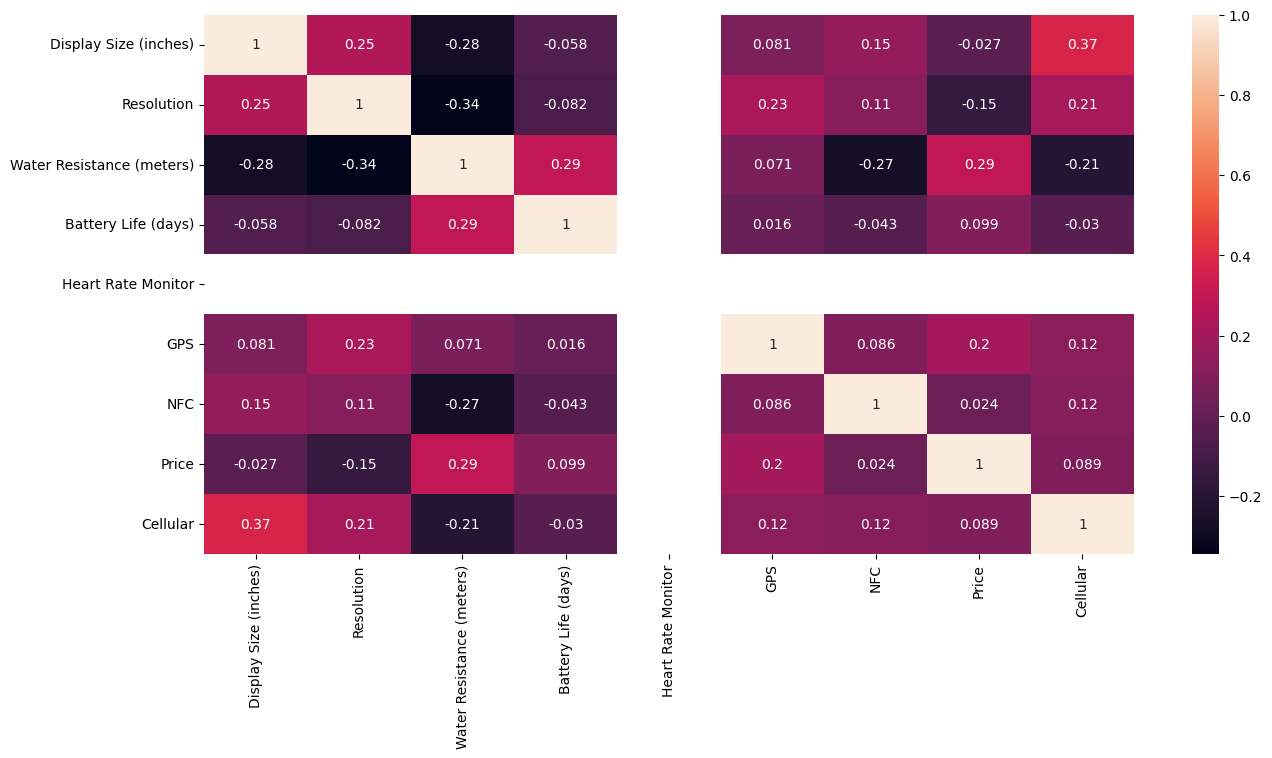

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(watch_prices.corr(),annot=True)

## Linear Regression Model

In [36]:
from sklearn.model_selection import train_test_split

X = watch_prices.drop("Price",axis=1)
y = watch_prices["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
lr.coef_, lr.intercept_

(array([ 2.04439224e+01, -4.04279090e+01,  1.95143558e+02,  2.79482590e-02,
        -3.83693077e-13,  1.50632283e+02,  5.38449180e+01,  7.97969000e+01]),
 -78.81230540161084)

In [40]:
preds = lr.predict(X_test)

In [41]:
from sklearn import metrics
print("MAE - ",metrics.mean_absolute_error(y_test, preds))
print("MSE - ",metrics.mean_squared_error(y_test,preds))

MAE -  78.29750238516526
MSE -  12077.42330060135


## NEURAL NETWORK MODEL

In [42]:
tf.random.set_seed(101)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

history_1 = model_1.fit(X_train, y_train, epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 14ms/step - loss: 306.2620 - mae: 306.2620
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 296.3246 - mae: 296.3246
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 287.7775 - mae: 287.7775
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 279.7123 - mae: 279.7123
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 272.5101 - mae: 272.5101
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 265.4047 - mae: 265.4047
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 259.5170 - mae: 259.5170
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 255.4127 - mae: 255.4127
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 252.1708 - mae: 252.1708
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 249.6895 - mae: 249.6895
Epoch 11/50
10/10 [=========

In [62]:
#Model 2
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(8,1)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])

history_2 = model_2.fit(X_train,y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 5ms/step - loss: 317.9042 - mae: 317.9042
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 317.1735 - mae: 317.1735
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 316.5840 - mae: 316.5840
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 315.9992 - mae: 315.9992
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 315.3160 - mae: 315.3160
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 314.4717 - mae: 314.4717
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 313.5823 - mae: 313.5823
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 312.3659 - mae: 312.3659
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 311.0768 - mae: 311.0768
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 309.6048 - mae: 309.6048
Epoch 11/100
10/10 

In [46]:
preds = model_2.predict(X_test)
preds

3/3 [==============================] - 0s 6ms/step


array([[286.35138],
       [258.91446],
       [289.07004],
       [258.91446],
       [271.7317 ],
       [283.57108],
       [240.73212],
       [206.22073],
       [190.93594],
       [285.51968],
       [304.95798],
       [302.76804],
       [271.7317 ],
       [313.75165],
       [271.37756],
       [279.4339 ],
       [286.35138],
       [285.2426 ],
       [286.11142],
       [282.26526],
       [302.76804],
       [285.22382],
       [279.62192],
       [310.7575 ],
       [268.65164],
       [286.35138],
       [275.67804],
       [285.51968],
       [271.3195 ],
       [329.09116],
       [285.5197 ],
       [210.92772],
       [314.34335],
       [275.85388],
       [295.33383],
       [282.26526],
       [249.50993],
       [264.81857],
       [269.4649 ],
       [275.85388],
       [268.6391 ],
       [307.91656],
       [271.37756],
       [269.42215],
       [272.7608 ],
       [285.51968],
       [275.67804],
       [275.02942],
       [278.40802],
       [271.37756],


In [58]:
tf.expand_dims(y_test,axis=1).shape, tf.constant(preds).shape

(TensorShape([75, 1]), TensorShape([75, 1]))

In [60]:
X_train.shape

(299, 8)

In [63]:
model_2.evaluate(y_test,preds)

3/3 [==============================] - 0s 6ms/step - loss: 350.5915 - mae: 350.5915


[350.5915222167969, 350.5915222167969]

### Creating a new Model

In [81]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(8,1)),
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"])

history_3 = model_3.fit(X_train, y_train, epochs=200,verbose=0)

In [82]:
preds_3 = model_3.predict(X_test)

3/3 [==============================] - 0s 8ms/step


In [83]:
model_3.evaluate(y_test, preds_3)

3/3 [==============================] - 0s 7ms/step - loss: 359.6508 - mae: 359.6508


[359.6508483886719, 359.6508483886719]

In [86]:
m = [1.2,1.0,1.0,24.0,1.0,1.0,1.0,0.0]
#Predicting by our neural network model
predicted_price = model_3.predict(tf.expand_dims(m,axis=1))
predicted_price #149?

1/1 [==============================] - 0s 23ms/step


array([[[277.01892]],

       [[277.72183]],

       [[277.72183]],

       [[234.6296 ]],

       [[277.72183]],

       [[277.72183]],

       [[277.72183]],

       [[281.23645]]], dtype=float32)

In [74]:
watch_prices.iloc[40]

Display Size (inches)          1.2
Resolution                     1.0
Water Resistance (meters)      1.0
Battery Life (days)           24.0
Heart Rate Monitor             1.0
GPS                            1.0
NFC                            1.0
Price                        149.0
Cellular                       0.0
Name: 43, dtype: float64

In [75]:
watch_prices.head(2)

,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price,Cellular
0,1.9,2,1,18,1,1,1,399,1
1,1.4,2,1,40,1,1,1,249,1


## Model 4 (Probably we are maing too complex model)

In [101]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.Input(shape=(8,1)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"])

history_4 = model_4.fit(X_train,y_train,epochs=500,verbose=0)


In [102]:
preds_4 = model_4.predict(X_test)
model_4.evaluate(y_test,preds)

3/3 [==============================] - 0s 6ms/step - loss: 79.0369 - mae: 79.0369


[79.036865234375, 79.036865234375]